In [148]:
# install
%pip install mne biosppy neurokit2 numpy pandas matplotlib seaborn peakutils ipywidgets 

Note: you may need to restart the kernel to use updated packages.


In [149]:
# all imports
import neurokit2 as nk
import biosppy.signals.eeg as eeg
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import os
from dotenv import load_dotenv

In [150]:
# enter file name here
load_dotenv()
file_name = "../raw/" + (os.getenv("FILE_PATH") if os.getenv("FILE_PATH") else "sample.set")

In [151]:
# load raw EEG data
raw = mne.io.read_raw_eeglab(file_name)

# get the data array
data = raw.get_data()

# get sampling frequency
sfreq = raw.info['sfreq']

raw.info

C:\Users\JINQI\AppData\Local\Temp\ipykernel_32528\3613712384.py:2: RuntimeWarning:

Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file

C:\Users\JINQI\AppData\Local\Temp\ipykernel_32528\3613712384.py:2: RuntimeWarning:

The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.



<Info | 8 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 dig: 132 items (3 Cardinal, 129 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 129
 projs: []
 sfreq: 500.0 Hz
>

In [152]:
# Dataset Information and Single Interactive Plot
print("Dataset Information:")
print(f"Sampling frequency: {sfreq} Hz")
print(f"Duration: {raw.times[-1]:.2f} seconds")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Data shape: {data.shape}")

# Single interactive EEG plotting function
def plot_eeg_channel(channel_idx=0, start_time=0, duration=10, plot_type='raw'):
    """Single interactive EEG plot"""
    
    # Calculate indices
    start_sample = int(start_time * sfreq)
    end_sample = int((start_time + duration) * sfreq)
    
    # Get data
    channel_name = raw.ch_names[channel_idx]
    signal = data[channel_idx, start_sample:end_sample]
    time = np.arange(len(signal)) / sfreq + start_time
    
    # Plot
    plt.figure(figsize=(12, 4))
    
    if plot_type == 'raw':
        plt.plot(time, signal, 'b-', linewidth=0.8)
        plt.title(f'{channel_name} - Raw Signal')
    else:  # filtered
        from scipy.signal import butter, filtfilt
        b, a = butter(4, [1/(sfreq/2), 50/(sfreq/2)], btype='band')
        filtered = filtfilt(b, a, signal)
        plt.plot(time, filtered, 'r-', linewidth=0.8)
        plt.title(f'{channel_name} - Filtered Signal (1-50Hz)')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (µV)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

widgets.interact_manual(
    plot_eeg_channel,
    channel_idx=(0, len(raw.ch_names)-1, 1),
    start_time=(0, raw.times[-1]-10, 1.0),
    duration=(1, 60, 1),
    plot_type=['raw', 'filtered']
)

Dataset Information:
Sampling frequency: 500.0 Hz
Duration: 320.48 seconds
Number of channels: 129
Data shape: (129, 160242)


interactive(children=(IntSlider(value=0, description='channel_idx', max=128), FloatSlider(value=0.0, descripti…

<function __main__.plot_eeg_channel(channel_idx=0, start_time=0, duration=10, plot_type='raw')>

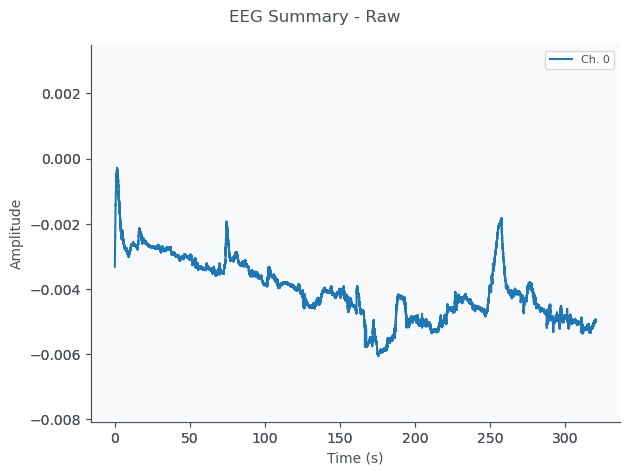

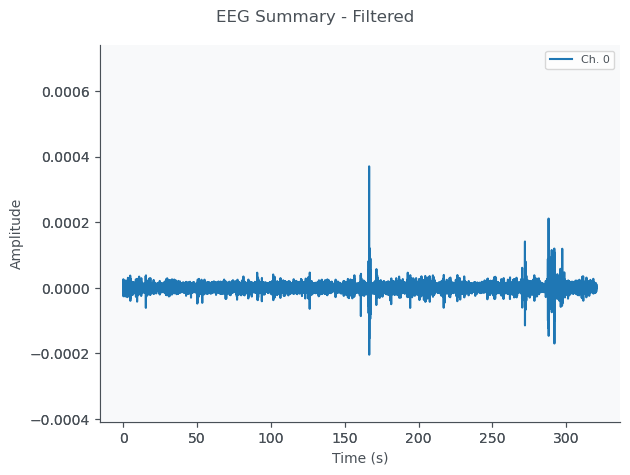

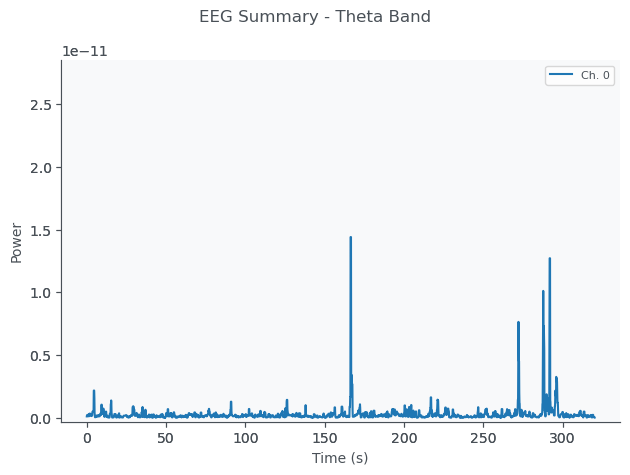

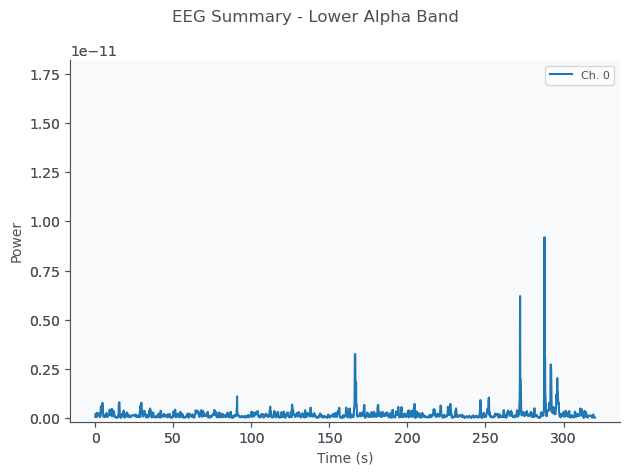

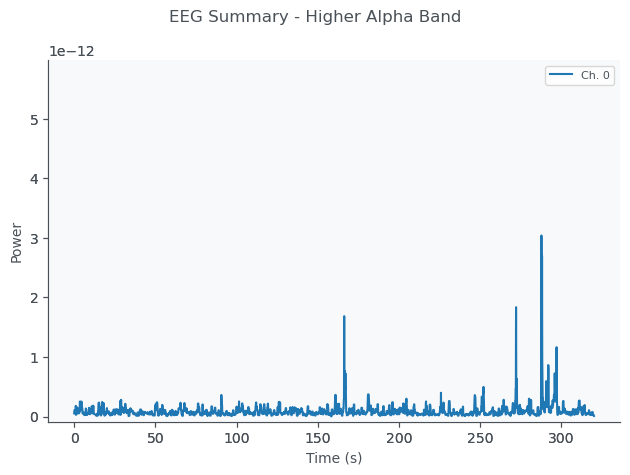

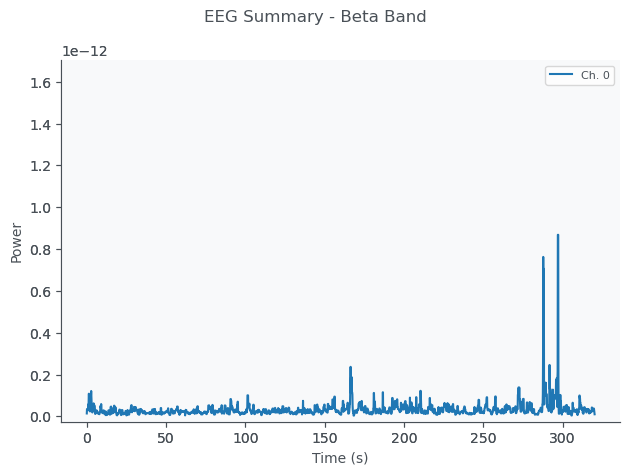

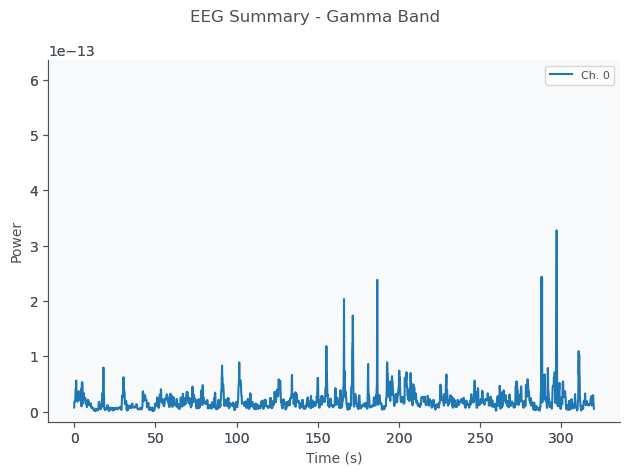

In [153]:
# analyze first channel
channel1_features = eeg.eeg(signal=data[0], sampling_rate=sfreq, show=True)

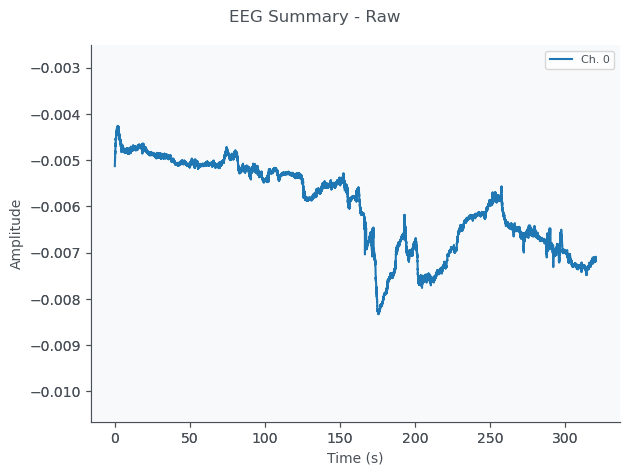

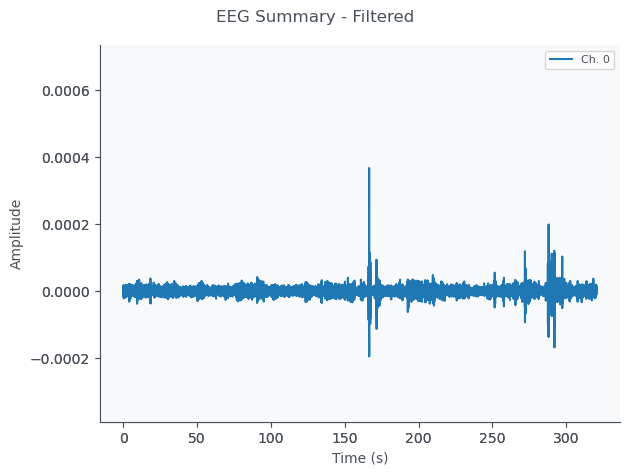

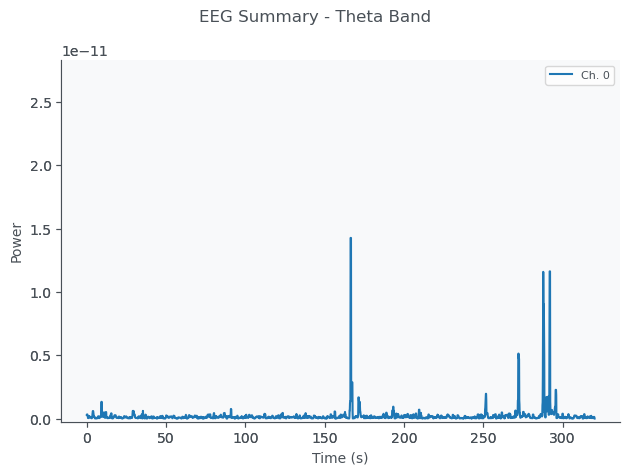

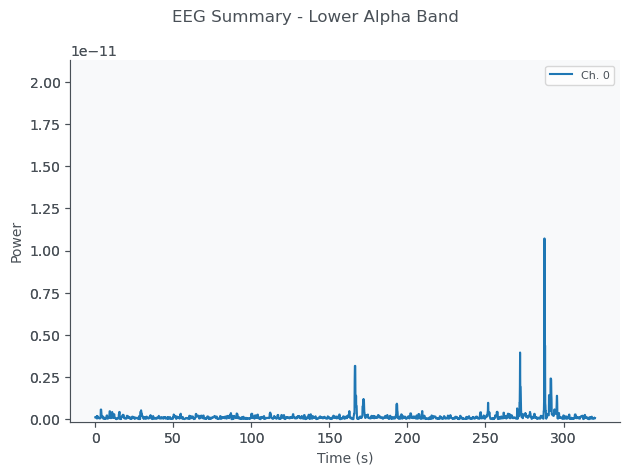

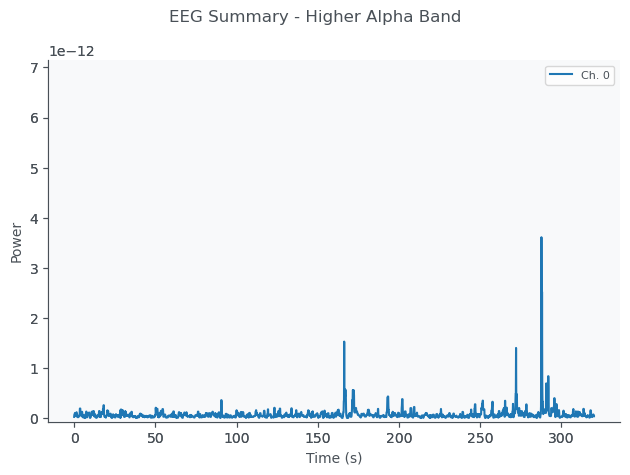

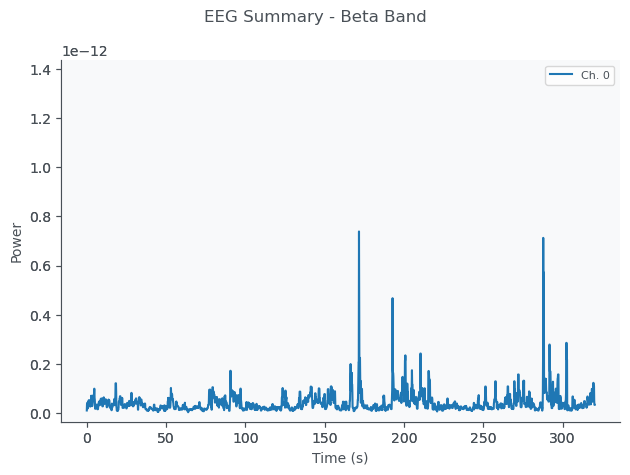

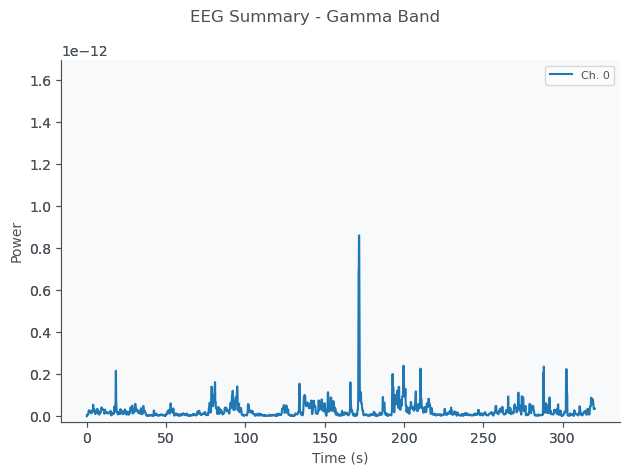

In [154]:
channel2_features = eeg.eeg(signal=data[1], sampling_rate=sfreq, show=True)